Exploration notebook

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
!ls

README.md
Untitled.ipynb
dsc-phase-1-project-v2-4-master


exploring im.db

In [3]:
conn = sqlite3.connect('dsc-phase-1-project-v2-4-master/zippedData/im.db')
cur = conn.cursor()

im.db table names

In [4]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [5]:
im_akas_df = pd.read_sql("SELECT * FROM movie_akas;", conn)

In [6]:
im_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [7]:
im_akas_df.ordering.describe()

count    331703.000000
mean          5.125872
std           6.706664
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max          61.000000
Name: ordering, dtype: float64

unsure what 'ordering' means

In [8]:
im_akas_df.region.value_counts()

US      51490
XWW     18467
RU      13817
DE      11634
FR      10990
        ...  
BUMM        1
SB          1
EH          1
CSHH        1
LY          1
Name: region, Length: 213, dtype: int64

In [9]:
im_ratings_df = pd.read_sql("SELECT * FROM movie_ratings;", conn)

In [10]:
im_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [11]:
im_basics_df = pd.read_sql("SELECT * FROM movie_basics;", conn)

In [12]:
im_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
conn.close()

In [14]:
tmdb_df = pd.read_csv('dsc-phase-1-project-v2-4-master/zippedData/tmdb.movies.csv')
tn_budgets_df = pd.read_csv('dsc-phase-1-project-v2-4-master/zippedData/tn.movie_budgets.csv')
bom_gross_df = pd.read_csv('dsc-phase-1-project-v2-4-master/zippedData/bom.movie_gross.csv')

In [15]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [16]:
tmdb_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [17]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [18]:
bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [19]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [20]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
tn_budgets_df['worldwide_gross'] = pd.to_numeric(tn_budgets_df['worldwide_gross'].str.replace('$','').str.replace(',',''))
tn_budgets_df['production_budget'] = pd.to_numeric(tn_budgets_df['production_budget'].str.replace('$','').str.replace(',',''))
tn_budgets_df['domestic_gross'] = pd.to_numeric(tn_budgets_df['domestic_gross'].str.replace('$','').str.replace(',',''))
tn_budgets_df['profit'] = tn_budgets_df['worldwide_gross'] - tn_budgets_df['production_budget']

In [22]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [23]:
tn_budgets_df['foreign gross'] = tn_budgets_df['worldwide_gross'] - tn_budgets_df['domestic_gross']

In [24]:
tn_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,foreign gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2015837654
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,804600000
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,107000000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,944008095
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,696540365
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,192013
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,0


In [25]:
tn_budgets_df = tn_budgets_df.rename(columns = {'movie':'title'})

<AxesSubplot:xlabel='foreign gross', ylabel='profit'>

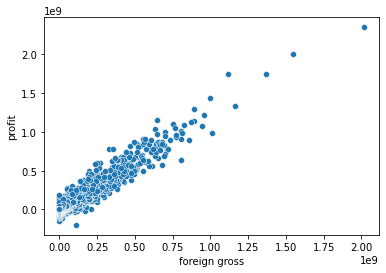

In [26]:
sns.scatterplot(x = tn_budgets_df['foreign gross'], y = tn_budgets_df['profit'])

<AxesSubplot:xlabel='domestic_gross', ylabel='profit'>

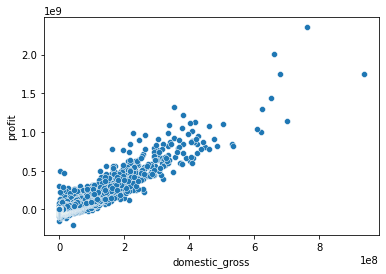

In [27]:
sns.scatterplot(x = tn_budgets_df['domestic_gross'], y = tn_budgets_df['profit'])

will merge from im.db:
    from movie_akas: title, region, language
    from movie_basics: start_year, genres
    from movie_ratings: averagerating
    
    on movie_id

In [28]:
merged_im_df = pd.merge(im_akas_df[['movie_id', 'title', 'region', 'language']], im_ratings_df[['movie_id', 'averagerating']], on = 'movie_id', how = 'inner')
merged_im_df = pd.merge(merged_im_df, im_basics_df[['movie_id', 'start_year','genres']], on = 'movie_id', how = 'inner')

In [29]:
merged_im_df

,movie_id,title,region,language,averagerating,start_year,genres
0,tt0369610,Джурасик свят,BG,bg,7.0,2015,"Action,Adventure,Sci-Fi"
1,tt0369610,Jurashikku warudo,JP,None,7.0,2015,"Action,Adventure,Sci-Fi"
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR,None,7.0,2015,"Action,Adventure,Sci-Fi"
3,tt0369610,O Mundo dos Dinossauros,BR,None,7.0,2015,"Action,Adventure,Sci-Fi"
4,tt0369610,Jurassic World,FR,None,7.0,2015,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...
261801,tt9726638,Monkey King: The Volcano,None,None,6.0,2019,"Action,Adventure,Comedy"
261802,tt9726638,Qi Tian Da Sheng Huo Yan Shan,CN,yue,6.0,2019,"Action,Adventure,Comedy"
261803,tt9827784,Sayonara kuchibiru,JP,None,7.7,2019,"Music,Romance"
261804,tt9827784,Sayonara kuchibiru,None,None,7.7,2019,"Music,Romance"


In [30]:
merged_im_df.head(20)

,movie_id,title,region,language,averagerating,start_year,genres
0,tt0369610,Джурасик свят,BG,bg,7.0,2015,"Action,Adventure,Sci-Fi"
1,tt0369610,Jurashikku warudo,JP,None,7.0,2015,"Action,Adventure,Sci-Fi"
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR,None,7.0,2015,"Action,Adventure,Sci-Fi"
3,tt0369610,O Mundo dos Dinossauros,BR,None,7.0,2015,"Action,Adventure,Sci-Fi"
4,tt0369610,Jurassic World,FR,None,7.0,2015,"Action,Adventure,Sci-Fi"
5,tt0369610,Jurassic World,GR,None,7.0,2015,"Action,Adventure,Sci-Fi"
6,tt0369610,Jurassic World,IT,None,7.0,2015,"Action,Adventure,Sci-Fi"
7,tt0369610,Jurski svijet,HR,None,7.0,2015,"Action,Adventure,Sci-Fi"
8,tt0369610,Olam ha'Yura,IL,he,7.0,2015,"Action,Adventure,Sci-Fi"
9,tt0369610,Jurassic World: Mundo Jurásico,MX,None,7.0,2015,"Action,Adventure,Sci-Fi"


In [31]:
merged_im_df2 = pd.merge(merged_im_df[['movie_id', 'title']], tn_budgets_df[['title', 'foreign gross']], on = 'title', how = 'left')

In [32]:
merged_im_df2 = merged_im_df2.dropna(subset = ['foreign gross'])

In [33]:
merged_im_df2

,movie_id,title,foreign gross
4,tt0369610,Jurassic World,996584239.0
5,tt0369610,Jurassic World,996584239.0
6,tt0369610,Jurassic World,996584239.0
11,tt0369610,Jurassic World,996584239.0
20,tt0369610,Jurassic World,996584239.0
...,...,...,...
261735,tt6215338,Stolen,17677973.0
261736,tt6215338,Stolen,17677973.0
262004,tt7076838,Adam,551194.0
262041,tt7166214,Bobby,9355005.0


In [34]:
merged_im_df = pd.merge(merged_im_df, merged_im_df2[['movie_id', 'foreign gross']], on='movie_id', how='left')

In [35]:
merged_im_df = merged_im_df.drop_duplicates()

In [36]:
merged_im_df

,movie_id,title,region,language,averagerating,start_year,genres,foreign gross
0,tt0369610,Джурасик свят,BG,bg,7.0,2015,"Action,Adventure,Sci-Fi",996584239.0
14,tt0369610,Jurashikku warudo,JP,None,7.0,2015,"Action,Adventure,Sci-Fi",996584239.0
28,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR,None,7.0,2015,"Action,Adventure,Sci-Fi",996584239.0
42,tt0369610,O Mundo dos Dinossauros,BR,None,7.0,2015,"Action,Adventure,Sci-Fi",996584239.0
56,tt0369610,Jurassic World,FR,None,7.0,2015,"Action,Adventure,Sci-Fi",996584239.0
...,...,...,...,...,...,...,...,...
423093,tt9726638,Monkey King: The Volcano,None,None,6.0,2019,"Action,Adventure,Comedy",NaN
423094,tt9726638,Qi Tian Da Sheng Huo Yan Shan,CN,yue,6.0,2019,"Action,Adventure,Comedy",NaN
423095,tt9827784,Sayonara kuchibiru,JP,None,7.7,2019,"Music,Romance",NaN
423096,tt9827784,Sayonara kuchibiru,None,None,7.7,2019,"Music,Romance",NaN


In [37]:
short_m_df = merged_im_df.dropna(subset = ['foreign gross'])
short_m_df

,movie_id,title,region,language,averagerating,start_year,genres,foreign gross
0,tt0369610,Джурасик свят,BG,bg,7.0,2015,"Action,Adventure,Sci-Fi",996584239.0
14,tt0369610,Jurashikku warudo,JP,None,7.0,2015,"Action,Adventure,Sci-Fi",996584239.0
28,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR,None,7.0,2015,"Action,Adventure,Sci-Fi",996584239.0
42,tt0369610,O Mundo dos Dinossauros,BR,None,7.0,2015,"Action,Adventure,Sci-Fi",996584239.0
56,tt0369610,Jurassic World,FR,None,7.0,2015,"Action,Adventure,Sci-Fi",996584239.0
...,...,...,...,...,...,...,...,...
422853,tt7076838,Adam,DE,None,5.6,2018,Drama,551194.0
422890,tt7166214,Bobby,IN,None,6.8,2017,"Comedy,Romance",9355005.0
423018,tt8976472,Ei koskaan enää,None,None,6.6,2018,"Documentary,Music",1162.0
423019,tt8976472,Never Again,XWW,en,6.6,2018,"Documentary,Music",1162.0


In [38]:
average_foreign_gross_by_region = pd.DataFrame(short_m_df.groupby('region')['foreign gross'].mean())

In [39]:
average_foreign_gross_by_region

,foreign gross
region,
AE,3.329541e+06
AL,2.253989e+08
AM,1.402904e+08
AR,1.022583e+08
AT,1.145229e+08
...,...
XKO,2.516310e+08
XSA,8.984125e+07
XWW,7.446678e+07


In [40]:
average_foreign_gross_by_region = average_foreign_gross_by_region.sort_values(by='foreign gross', ascending=False)
average_foreign_gross_by_region.head(20)

,foreign gross
region,
LK,4.565084e+08
CI,4.268378e+08
BD,3.401029e+08
LI,2.835916e+08
SV,2.752494e+08
CM,2.666190e+08
MY,2.587090e+08
XKO,2.516310e+08
IS,2.355694e+08


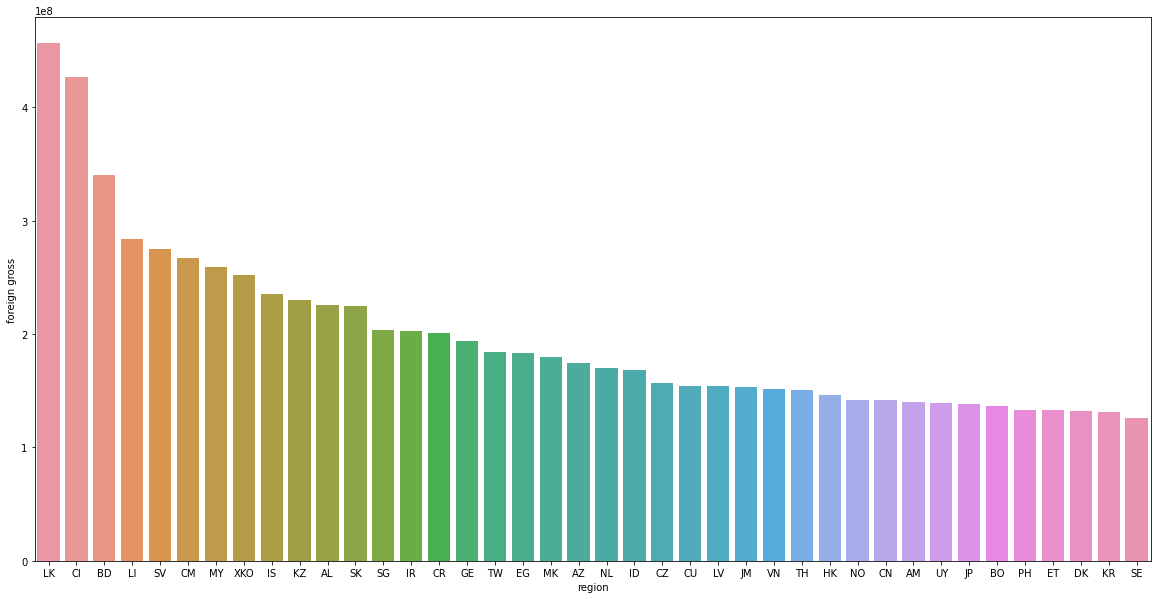

In [41]:
plt.figure(figsize=(20, 10))
sns.barplot(x = average_foreign_gross_by_region.index[:40], y = average_foreign_gross_by_region['foreign gross'][:40])
plt.show()

In [42]:
region_counts = pd.DataFrame(merged_im_df['region'].value_counts())
region_counts.head()

,region
US,30469
XWW,15345
RU,13064
DE,9706
FR,8520


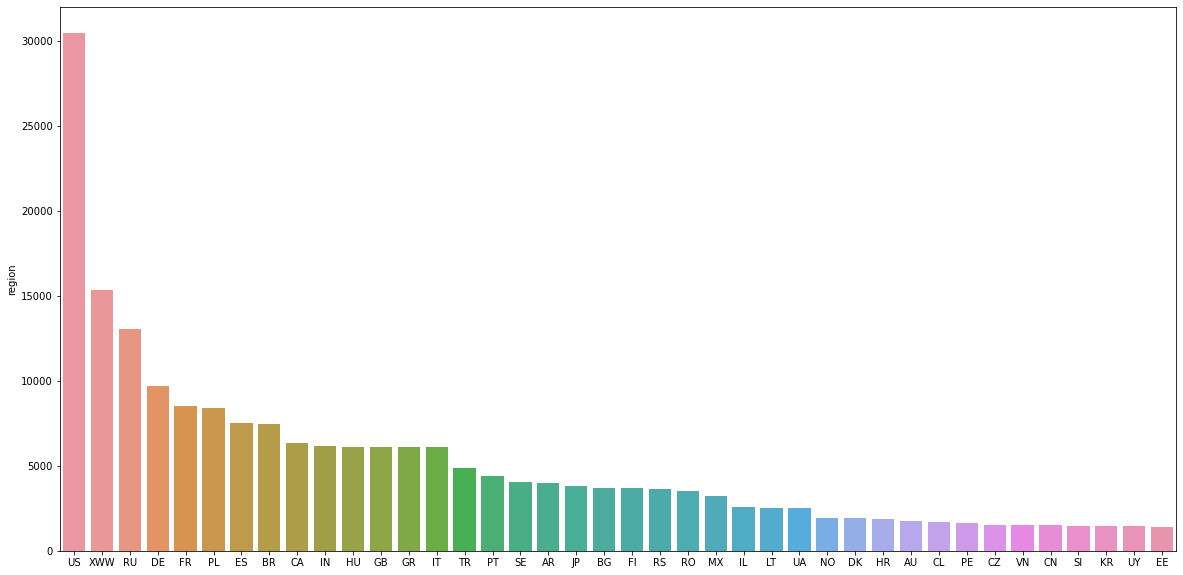

In [43]:
plt.figure(figsize=(20, 10))
sns.barplot(x = region_counts.index[:40], y = region_counts['region'][:40])
plt.show()

In [44]:
total_foreign_gross_by_region = pd.DataFrame(short_m_df.groupby('region')['foreign gross'].sum())

In [45]:
total_foreign_gross_by_region = total_foreign_gross_by_region.sort_values(by='foreign gross', ascending=False)
total_foreign_gross_by_region.head(20)

,foreign gross
region,
US,3.235229e+11
GR,1.917301e+11
ES,1.687709e+11
CA,1.579645e+11
BR,1.547137e+11
RU,1.535899e+11
PL,1.507174e+11
RS,1.409513e+11
TR,1.406108e+11


In [46]:
total_foreign_gross_by_region_year = pd.DataFrame(merged_im_df.groupby(['region','start_year'])['foreign gross'].sum())

In [47]:
total_foreign_gross_by_region_year.head(20)

foreign gross
region start_year               
AD     2016                  0.0
       2017                  0.0
AE     2010                  0.0
       2011                  0.0
       2012            1703281.0
       2013                  0.0
       2014            7950940.0
       2015             157626.0
       2016                  0.0
       2017           20154020.0
       2018                  0.0
       2019                  0.0
AF     2010                  0.0
       2011                  0.0
       2012                  0.0
       2013                  0.0
       2014                  0.0
       2015                  0.0
       2016                  0.0
       2017                  0.0

In [48]:
total_foreign_gross_by_region_year = total_foreign_gross_by_region_year.reset_index()
pivot_table = total_foreign_gross_by_region_year.pivot(index='start_year', columns='region', values='foreign gross')

In [49]:
total_foreign_gross_by_region_year

,region,start_year,foreign gross
0,AD,2016,0.0
1,AD,2017,0.0
2,AE,2010,0.0
3,AE,2011,0.0
4,AE,2012,1703281.0
...,...,...,...
1295,ZA,2018,0.0
1296,ZA,2019,0.0
1297,ZM,2010,0.0
1298,ZW,2010,0.0


In [50]:
total_foreign_gross_by_region_year = total_foreign_gross_by_region_year[total_foreign_gross_by_region_year['foreign gross'] != 0]

In [51]:
total_foreign_gross_by_region_year

,region,start_year,foreign gross
4,AE,2012,1703281.0
6,AE,2014,7950940.0
7,AE,2015,157626.0
9,AE,2017,20154020.0
24,AL,2010,656864645.0
...,...,...,...
1289,ZA,2012,880144004.0
1290,ZA,2013,22742449.0
1291,ZA,2014,42678311.0
1292,ZA,2015,73432788.0


In [52]:
total_foreign_gross_by_region_year = total_foreign_gross_by_region_year.reset_index()
pivot_table = total_foreign_gross_by_region_year.pivot(index='start_year', columns='region', values='foreign gross')

In [56]:
pivot_table = pivot_table.transpose()

In [58]:
pivot_table

start_year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
region,,,,,,,,,,
AE,NaN,NaN,1.703281e+06,NaN,7.950940e+06,1.576260e+05,NaN,2.015402e+07,NaN,NaN
AL,6.568646e+08,1.711207e+08,6.104325e+08,1.355270e+09,4.903144e+09,3.815318e+09,7.005739e+09,2.454441e+09,3.174052e+09,8.729000e+08
AM,NaN,7.697160e+05,NaN,NaN,NaN,NaN,4.955370e+05,4.196060e+08,NaN,NaN
AR,1.325424e+10,1.213819e+10,1.489044e+10,1.502750e+10,1.732266e+10,1.444404e+10,1.688693e+10,1.567730e+10,1.507585e+10,4.149668e+09
AT,1.968450e+09,4.700515e+08,1.722167e+09,6.793440e+08,5.511940e+05,3.754598e+08,7.770200e+04,4.360182e+08,4.473579e+08,8.476174e+07
...,...,...,...,...,...,...,...,...,...,...
XKO,NaN,NaN,NaN,NaN,2.516310e+08,NaN,NaN,NaN,NaN,NaN
XSA,3.514506e+08,9.476716e+08,4.849654e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XWW,5.026426e+09,6.364933e+09,4.720390e+09,2.848343e+09,5.218418e+09,8.468130e+09,8.921389e+09,8.196648e+09,8.728578e+09,3.016302e+09


<AxesSubplot:xlabel='region'>

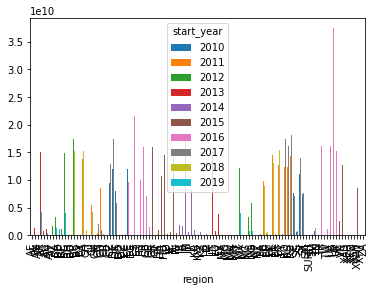

In [57]:
pivot_table.plot(kind='bar')

In [60]:
pivot_table = pivot_table.dropna()

In [62]:
pivot_table

start_year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
region,,,,,,,,,,
AL,6.568646e+08,1.711207e+08,6.104325e+08,1.355270e+09,4.903144e+09,3.815318e+09,7.005739e+09,2.454441e+09,3.174052e+09,8.729000e+08
AR,1.325424e+10,1.213819e+10,1.489044e+10,1.502750e+10,1.732266e+10,1.444404e+10,1.688693e+10,1.567730e+10,1.507585e+10,4.149668e+09
AT,1.968450e+09,4.700515e+08,1.722167e+09,6.793440e+08,5.511940e+05,3.754598e+08,7.770200e+04,4.360182e+08,4.473579e+08,8.476174e+07
AU,2.145637e+09,1.628313e+09,1.520032e+09,1.169028e+09,1.360005e+09,3.312681e+09,1.936340e+09,2.184727e+09,1.590438e+09,3.207000e+08
BA,4.068980e+08,3.706574e+08,3.316843e+09,1.431896e+09,9.680703e+08,6.163639e+08,1.620660e+09,1.855805e+09,4.809134e+09,1.348414e+09
BG,1.249653e+10,1.273372e+10,1.495504e+10,1.521607e+10,1.804462e+10,1.466029e+10,1.633673e+10,1.579793e+10,1.375453e+10,4.039932e+09
BR,1.507630e+10,1.355049e+10,1.744370e+10,1.578938e+10,1.837769e+10,1.841083e+10,1.723467e+10,1.929831e+10,1.520330e+10,4.329047e+09
CA,1.442959e+10,1.384845e+10,1.799546e+10,1.745940e+10,2.013279e+10,1.767251e+10,1.993971e+10,1.827599e+10,1.525446e+10,2.956137e+09
CL,3.707081e+09,5.554155e+09,1.244633e+10,1.331344e+10,1.584470e+10,1.461001e+10,1.579984e+10,1.525635e+10,4.144834e+09,2.600575e+09


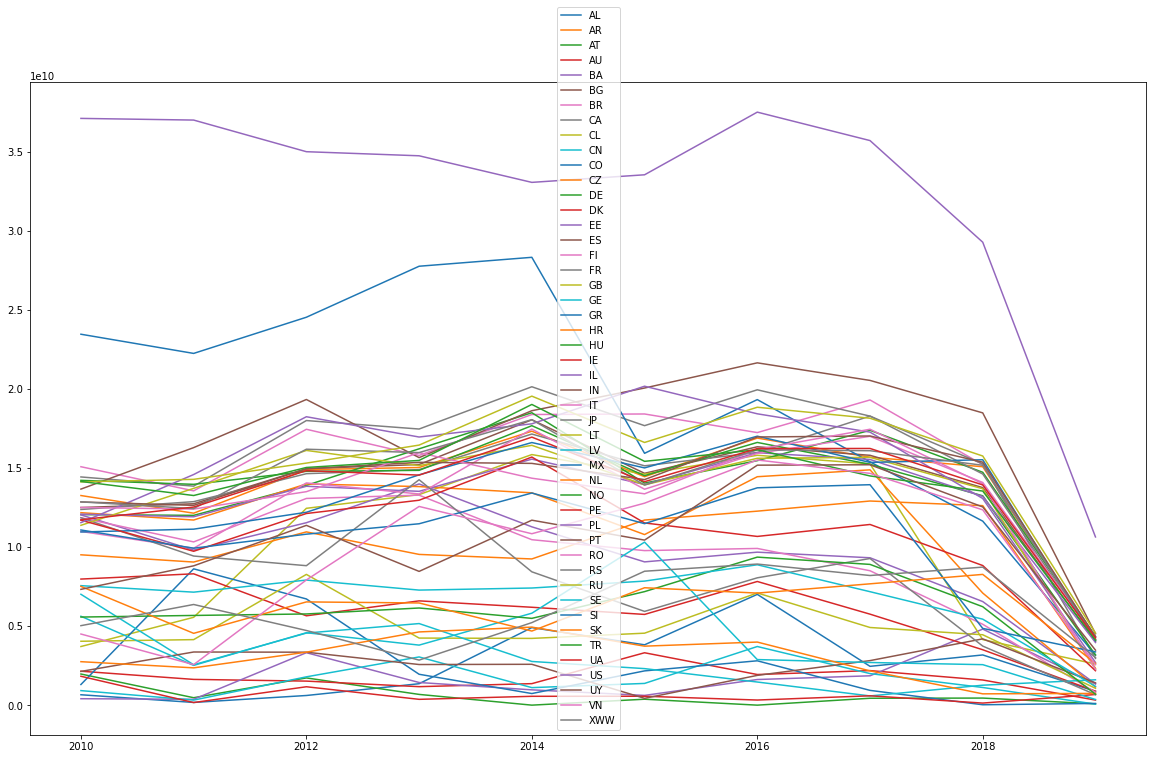

In [65]:
transposed_df = pivot_table.transpose()

plt.figure(figsize=(20, 12))

for region in transposed_df.columns:
    region_data = transposed_df[[region]]
    plt.plot(region_data.index, region_data[region], label=region)

plt.legend()
plt.show()
